# Bagging and Pasting

In [89]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [77]:
def plotDecisionRegion(X, clf, pts):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.clf()
    cmap = plt.get_cmap('cool')
    plt.contourf(xx, yy, Z, alpha=0.2)
    i = 0
    for pt in pts:
        plt.scatter(pt[0], pt[1], cmap=cmap, label='Category {}'.format(i))
        i += 1
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

## Load some dummy data

We again use the moon dataset to create some dummy data for our classification.

In [143]:
X, y = make_moons(n_samples=500, noise=0.26)
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Plot the training data

In [144]:
x_circ_1 = []
y_circ_1 = []
x_circ_2 = []
y_circ_2 = []
for i in range(len(y_train)):
    if y_train[i] == 0:
        x_circ_1.append(X_train[i][0])
        y_circ_1.append(X_train[i][1])
    else:
        x_circ_2.append(X_train[i][0])
        y_circ_2.append(X_train[i][1])

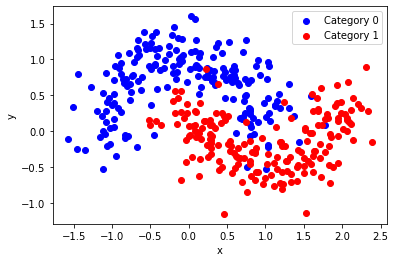

In [145]:
plt.scatter(x_circ_1, y_circ_1, c='b', label='Category 0')
plt.scatter(x_circ_2, y_circ_2, c='r', label='Category 1')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Use a bagging classifier on 500 decision trees

We use a bagging classifier based on 500 decision tree classifiers with 100 training samples each.

In [165]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, n_jobs=-1)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

### Check the accuracy

In [166]:
y_predict = bag_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.928

### Plot the decision regions

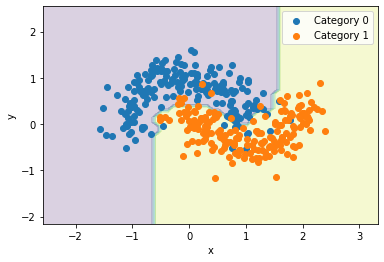

In [167]:
plotDecisionRegion(X_train, bag_clf, [[x_circ_1, y_circ_1], [x_circ_2, y_circ_2]])

## Use a single decision tree classifier

We compare the performance with a single decision tree classifier, e.g. with depth 4:

In [168]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Check the accuracy

In [169]:
y_predict = tree_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.904

### Plot the decision regions

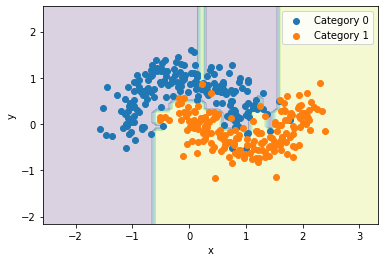

In [170]:
plotDecisionRegion(X_train, tree_clf, [[x_circ_1, y_circ_1], [x_circ_2, y_circ_2]])

## Out-of-bag evaluation

Since bagging relies on resampling with replacement, on average, 37% of the training data is actually not used for training. This out-of-bag training data can be used for automatic evaluation without the need for explicitly specifying a test set by setting the **oob_score** parameter to `True`:

In [171]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [172]:
bag_clf.oob_score_

0.9386666666666666

We can verify this by comparing it to the score we get on the test set:

In [173]:
y_predict = bag_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.928

The out-of-bag decision function allows access to the probabilities for each out-of-bag training instance to belong to the classes:

In [176]:
bag_clf.oob_decision_function_

array([[0.96708861, 0.03291139],
       [0.9973545 , 0.0026455 ],
       [0.05912596, 0.94087404],
       [0.07310705, 0.92689295],
       [0.00258398, 0.99741602],
       [0.96560847, 0.03439153],
       [0.95707071, 0.04292929],
       [0.05276382, 0.94723618],
       [0.99501247, 0.00498753],
       [0.96185286, 0.03814714],
       [0.10362694, 0.89637306],
       [0.04896907, 0.95103093],
       [0.98157895, 0.01842105],
       [0.99462366, 0.00537634],
       [1.        , 0.        ],
       [0.98663102, 0.01336898],
       [0.        , 1.        ],
       [0.18271605, 0.81728395],
       [0.92211055, 0.07788945],
       [0.20779221, 0.79220779],
       [0.84677419, 0.15322581],
       [0.98944591, 0.01055409],
       [0.43236074, 0.56763926],
       [0.95989305, 0.04010695],
       [1.        , 0.        ],
       [0.01023018, 0.98976982],
       [0.98927614, 0.01072386],
       [0.79842932, 0.20157068],
       [0.13333333, 0.86666667],
       [0.41666667, 0.58333333],
       [0.